# Regressions and BlackBox Methods


## Part 1. Classification with BartRider data <br>
You have been given a data file by the San Francisco Bay Area Rapid Transit (BART), which identifies a set of demographics for residents in a local area. We will use this file to determine if a resident is a rider.
<br><br>
VARIABLE DESCRIPTIONS:<br>
<br>
Age:  

            1.   14 thru 17
            2.   18 thru 24
            3.   25 thru 34
            4.   35 thru 44
            5.   45 thru 54
            6.   55 thru 64
            7.   65 and Over

DistToWork: Distance to work in miles<br>
DualInc: Is dual income household or not<br>
Education:  
            
            1. Grade 8 or less<br>
            2. Grades 9 to 11<br>
            3. Graduated high school<br>
            4. 1 to 3 years of college<br>
            5. College graduate<br>
            6. Grad Study<br>
Gender:	M or F<br>
Income:
        
            1. Less than $10,000<br>
            2. $10,000 to $14,999<br>
            3. $15,000 to $19,999<br>
            4. $20,000 to $24,999<br>
            5. $25,000 to $29,999<br>
            6. $30,000 to $39,999<br>
            7. $40,000 to $49,999<br>
            8. $50,000 to $74,999<br>
            9. $75,000 or more<br>
Language:	Language spoken at home<br>
NbrInHouseHold:	Number in household<br>
NbrInHouseholdUnder18:	Number in household under 18 years old<br>
OwnRent:	Own, rent, or live with parents<br>
YrsInArea:	Years lived in bay area<br>
Rider:	No, Non-rider; Yes, Rider<br>
<br>
**Target variable: Rider**

### 1.Upload and clean data

In [ ]:
# Mounting Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Import libraries
import pandas as pd
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn import linear_model
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report

In [ ]:
# Read data
BartRider = pd.read_csv('/content/drive/MyDrive/IS470_data/BartRider.csv')
BartRider

,Age,DistToWork,DualInc,Education,Gender,Income,Language,NbrInHouseHold,NbrInHouseholdUnder18,OwnRent,YrsInArea,Rider
0,7,14,N,3,F,3,English,1,0,Rent,5,Yes
1,7,10,N,5,M,8,English,2,0,Own,5,No
2,3,9,N,3,M,1,English,1,0,Rent,5,Yes
3,1,13,N,2,M,1,English,5,3,Parent,5,Yes
4,3,14,N,5,F,2,English,3,1,Parent,5,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...
5488,3,11,Y,4,M,5,English,2,0,Own,5,Yes
5489,4,9,Y,3,F,6,English,3,1,Rent,2,Yes
5490,2,7,N,4,M,2,English,1,1,Rent,1,Yes
5491,3,7,Y,3,F,9,English,2,0,Own,5,No


In [ ]:
# Examine the number of rows and cols
BartRider.shape

(5493, 12)

In [ ]:
# Examine variable type
BartRider.dtypes

Age                       int64
DistToWork                int64
DualInc                  object
Education                 int64
Gender                   object
Income                    int64
Language                 object
NbrInHouseHold            int64
NbrInHouseholdUnder18     int64
OwnRent                  object
YrsInArea                 int64
Rider                    object
dtype: object

In [ ]:
# Change categorical variables to "category"
BartRider['DualInc'] = BartRider['DualInc'].astype('category')
BartRider['Gender'] = BartRider['Gender'].astype('category')
BartRider['Language'] = BartRider['Language'].astype('category')
BartRider['OwnRent'] = BartRider['OwnRent'].astype('category')
BartRider['Rider'] = BartRider['Rider'].astype('category')

In [ ]:
# Examine variable type again
BartRider.dtypes

Age                         int64
DistToWork                  int64
DualInc                  category
Education                   int64
Gender                   category
Income                      int64
Language                 category
NbrInHouseHold              int64
NbrInHouseholdUnder18       int64
OwnRent                  category
YrsInArea                   int64
Rider                    category
dtype: object

### 2.Data partitioning and inspection code (7 points)

In [ ]:
# Create dummy variables for DualInc, Gender, Language, and OwnRent	(1 points)
BartRider = pd.get_dummies(BartRider, columns=['DualInc','Gender','Language','OwnRent'], drop_first=True)
BartRider

,Age,DistToWork,Education,Income,NbrInHouseHold,NbrInHouseholdUnder18,YrsInArea,Rider,DualInc_Y,Gender_M,Language_Other,Language_Spanish,OwnRent_Parent,OwnRent_Rent
0,7,14,3,3,1,0,5,Yes,0,0,0,0,0,1
1,7,10,5,8,2,0,5,No,0,1,0,0,0,0
2,3,9,3,1,1,0,5,Yes,0,1,0,0,0,1
3,1,13,2,1,5,3,5,Yes,0,1,0,0,1,0
4,3,14,5,2,3,1,5,Yes,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5488,3,11,4,5,2,0,5,Yes,1,1,0,0,0,0
5489,4,9,3,6,3,1,2,Yes,1,0,0,0,0,1
5490,2,7,4,2,1,1,1,Yes,0,1,0,0,0,1
5491,3,7,3,9,2,0,5,No,1,0,0,0,0,0


In [ ]:
# Define target variable and predictors (1 point)
target = BartRider['Rider']
predictors = BartRider.drop(['Rider'],axis=1)
# Apply minmax normalization on predictors (1 points)
min_max_scaler = preprocessing.MinMaxScaler()
predictors_normalized = pd.DataFrame(min_max_scaler.fit_transform(predictors))
predictors_normalized.columns = predictors.columns
predictors_normalized

,Age,DistToWork,Education,Income,NbrInHouseHold,NbrInHouseholdUnder18,YrsInArea,DualInc_Y,Gender_M,Language_Other,Language_Spanish,OwnRent_Parent,OwnRent_Rent
0,1.000000,0.647059,0.4,0.250,0.000,0.000000,1.00,0.0,0.0,0.0,0.0,0.0,1.0
1,1.000000,0.411765,0.8,0.875,0.125,0.000000,1.00,0.0,1.0,0.0,0.0,0.0,0.0
2,0.333333,0.352941,0.4,0.000,0.000,0.000000,1.00,0.0,1.0,0.0,0.0,0.0,1.0
3,0.000000,0.588235,0.2,0.000,0.500,0.333333,1.00,0.0,1.0,0.0,0.0,1.0,0.0
4,0.333333,0.647059,0.8,0.125,0.250,0.111111,1.00,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5488,0.333333,0.470588,0.6,0.500,0.125,0.000000,1.00,1.0,1.0,0.0,0.0,0.0,0.0
5489,0.500000,0.352941,0.4,0.625,0.250,0.111111,0.25,1.0,0.0,0.0,0.0,0.0,1.0
5490,0.166667,0.235294,0.6,0.125,0.000,0.111111,0.00,0.0,1.0,0.0,0.0,0.0,1.0
5491,0.333333,0.235294,0.4,1.000,0.125,0.000000,1.00,1.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# Partition the data to predictors_train, predictors_test, target_train, and target_test. Set test_size=0.3 and random_state=0. (2 points)
predictors_train, predictors_test, target_train, target_test = train_test_split(predictors_normalized, target, test_size=0.3, random_state=0)
print(predictors_train.shape, predictors_test.shape, target_train.shape, target_test.shape)

(3845, 13) (1648, 13) (3845,) (1648,)


In [ ]:
# Examine the proportion of target variable for training data set (using the value_counts function) (1 point)
print(target_train.value_counts(normalize=True))

No     0.579714
Yes    0.420286
Name: Rider, dtype: float64


In [ ]:
# Examine the proportion of target variable for testing data set (using the value_counts function) (1 point)
print(target_test.value_counts(normalize=True))

No     0.552184
Yes    0.447816
Name: Rider, dtype: float64


### 3.Neural Network for classification (5 points)

In [ ]:
# Build a MLP model contains three hidden layers: 16 hidden nodes for the first layer, 8 hidden nodes for the second layer, and 8 hidden nodes for the third layer. Set random_state=1. (2 points)
model_MLP = MLPClassifier(hidden_layer_sizes=(16,8,8), random_state=1)
model_MLP.fit(predictors_train, target_train)

/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=(16, 8, 8), random_state=1)

In [ ]:
# Make predictions on testing data (1 point)
prediction_on_test = model_MLP.predict(predictors_test)

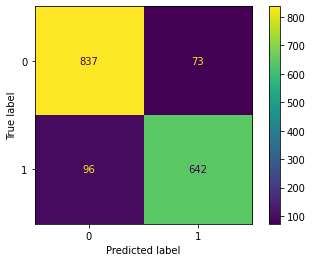

In [ ]:
# Examine the evaluation results on testing data: confusion_matrix (1 point)
cm = confusion_matrix(target_test, prediction_on_test, labels=model_MLP.classes_)
ConfusionMatrixDisplay(cm).plot()

In [ ]:
# Examine the evaluation results on testing data: accuracy, precision, recall, and f1-score (1 point)
print(classification_report(target_test, prediction_on_test))

              precision    recall  f1-score   support

          No       0.90      0.92      0.91       910
         Yes       0.90      0.87      0.88       738

    accuracy                           0.90      1648
   macro avg       0.90      0.89      0.90      1648
weighted avg       0.90      0.90      0.90      1648



### 4.SVM for classification (6 points)

In [ ]:
# Build a SVM model with C=1 (2 points)
model_SVM = SVC(C=1)
model_SVM.fit(predictors_train, target_train)

SVC(C=1)

In [ ]:
# Make predictions on testing data (1 point)
prediction_on_test = model_SVM.predict(predictors_test)

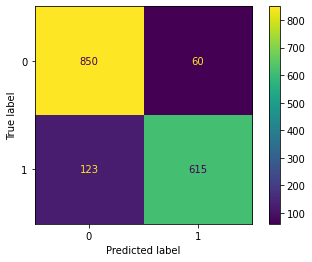

In [ ]:
# Examine the evaluation results on testing data: confusion_matrix (1 point)
cm = confusion_matrix(target_test, prediction_on_test, labels=model_SVM.classes_)
ConfusionMatrixDisplay(cm).plot()

In [ ]:
# Examine the evaluation results on testing data: accuracy, precision, recall, and f1-score (1 point)
print(classification_report(target_test, prediction_on_test))

              precision    recall  f1-score   support

          No       0.87      0.93      0.90       910
         Yes       0.91      0.83      0.87       738

    accuracy                           0.89      1648
   macro avg       0.89      0.88      0.89      1648
weighted avg       0.89      0.89      0.89      1648



Q1. Which model has better performance, SVM or MLP? (1 points)<br>
MLP has better performance, because it has higher accuracy and F-measure values on the testing data.

## Part 2. Numeric Prediction with Game Sale data <br>
Video games are a billion-dollar business and have been for many years. In 2016, the video game market in the United States was valued at 17.68 billion U.S. dollars. That same year U.S. consumers were said to spend roughly double the amount on gaming content, hardware and accessories. What is important is that the first generation of gamers is now grown up with significant spending power; therefore, despite high penetration rates among kids, video games can no longer be considered solely a child's play. In fact, it was found that video gaming is gaining on popularity among the seniors in the United States.<br>
<br>
This data provides video sales information together with game scores and ratings. Our task is to predict game sales by given the information of each game.
<br><br>
VARIABLE DESCRIPTIONS:<br>
<br>
Name: Game name<br>
Platform: Platform of the games release (i.e. PC,PS4, etc.)<br>
Genre: Genre of the game<br>
Global_Sales: Total worldwide sales (in millions)<br>
Critic_Score: Aggregate score compiled by Metacritic staff<br>
Critic_Count: The number of critics used in coming up with the Critic_score <br>
User_Score: Score by Metacritic's subscribers<br>
User_Count: Number of users who gave the user_score<br>
Rating: The ESRB ratings<br>
<br>
**Target variable: Global_Sales**

### 1.Upload and clean data (1 point)

In [ ]:
# Import libraries
import pandas as pd
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn import linear_model
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from matplotlib import pyplot as plt
from sklearn.metrics import classification_report

In [ ]:
# Read data
Sales = pd.read_csv('/content/drive/MyDrive/IS470_data/sales.csv')
Sales

,Name,Platform,Genre,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Rating
0,The Legend of Zelda: Twilight Princess,Wii,Action,7.15,95,73,89,1658,T
1,Super Smash Bros. Melee,GC,Fighting,7.07,92,38,90,568,T
2,Medal of Honor: Frontline,PS2,Shooter,6.83,88,29,84,135,T
3,Uncharted 3: Drake's Deception,PS3,Action,6.74,92,97,82,3712,T
4,Uncharted 2: Among Thieves,PS3,Action,6.66,96,105,87,5187,T
...,...,...,...,...,...,...,...,...,...
6937,Act of Aggression,PC,Strategy,0.01,71,37,70,93,missing
6938,Root Letter,PS4,Adventure,0.01,69,13,74,11,missing
6939,Colin McRae Rally 04,PC,Racing,0.01,87,6,71,44,missing
6940,Prison Architect,XOne,Action,0.01,74,13,66,7,missing


In [ ]:
# Examine the number of rows and cols
Sales.shape

(6942, 9)

In [ ]:
# Drop (remove) the Name column
Sales = Sales.drop(['Name'],axis=1)

**Q2. Explain why we should remove the name column? (1 points)**<br>
The Name column doesn't provide useful information for predicting Global_Sales. And we will have too many dummy variables if Name column is included.

In [ ]:
# Examine variable type
Sales.dtypes

Platform         object
Genre            object
Global_Sales    float64
Critic_Score      int64
Critic_Count      int64
User_Score        int64
User_Count        int64
Rating           object
dtype: object

In [ ]:
# Change categorical variables to "category"
Sales['Platform'] = Sales['Platform'].astype('category')
Sales['Genre'] = Sales['Genre'].astype('category')
Sales['Rating'] = Sales['Rating'].astype('category')

In [ ]:
# Examine variable type again
Sales.dtypes

Platform        category
Genre           category
Global_Sales     float64
Critic_Score       int64
Critic_Count       int64
User_Score         int64
User_Count         int64
Rating          category
dtype: object

### 2.Data partitioning and inspection code (7 points)

In [ ]:
# Create dummy variables for Platform, Genre, and Rating	(2 points)
Sales = pd.get_dummies(Sales, columns=['Platform','Genre','Rating'], drop_first=True)
Sales

,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Platform_DC,Platform_DS,Platform_GBA,Platform_GC,Platform_PC,...,Genre_Racing,Genre_Role-Playing,Genre_Shooter,Genre_Simulation,Genre_Sports,Genre_Strategy,Rating_E10+,Rating_M,Rating_T,Rating_missing
0,7.15,95,73,89,1658,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,7.07,92,38,90,568,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
2,6.83,88,29,84,135,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
3,6.74,92,97,82,3712,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,6.66,96,105,87,5187,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6937,0.01,71,37,70,93,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,1
6938,0.01,69,13,74,11,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
6939,0.01,87,6,71,44,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,1
6940,0.01,74,13,66,7,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [ ]:
# Partition the data to predictors_train, predictors_test, target_train, and target_test. Set test_size=0.3 and random_state=0. (3 points)
target = Sales['Global_Sales']
predictors = Sales.drop(['Global_Sales'],axis=1)
predictors_train, predictors_test, target_train, target_test = train_test_split(predictors, target, test_size=0.3, random_state=0)
print(predictors_train.shape, predictors_test.shape, target_train.shape, target_test.shape)

(4859, 35) (2083, 35) (4859,) (2083,)


Text(0.5, 1.0, 'Histogram of Global_Sales in the training data set')

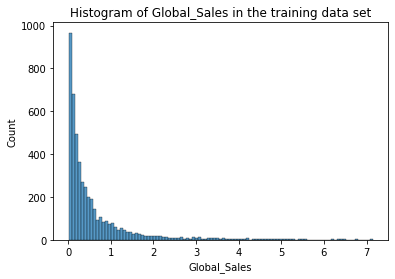

In [ ]:
# Examine the distribution of target variable for training data set (using the histplot function). (1 point)
snsplot = sns.histplot(data = target_train)
snsplot.set_title("Histogram of Global_Sales in the training data set")

Text(0.5, 1.0, 'Histogram of Global_Sales in the testing data set')

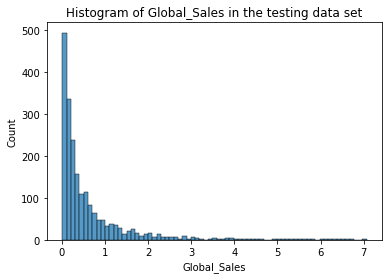

In [ ]:
# Examine the distribution of target variable for testing data set (using the histplot function). (1 point)
snsplot = sns.histplot(data = target_test)
snsplot.set_title("Histogram of Global_Sales in the testing data set")

### 3.Multiple Linear Regression model for predicting Global_Sales value. (11 points)

In [ ]:
# Build a multiple linear regression model with all predictors (2 points)
model_lr = linear_model.LinearRegression()
model_lr.fit(predictors_train, target_train)

LinearRegression()

In [ ]:
# Show the linear regression model summary (1 point)
import statsmodels.api as sm
X2 = sm.add_constant(predictors_train)
y = target_train
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:           Global_Sales   R-squared:                       0.307
Model:                            OLS   Adj. R-squared:                  0.302
Method:                 Least Squares   F-statistic:                     61.13
Date:                Wed, 15 Mar 2023   Prob (F-statistic):               0.00
Time:                        23:57:11   Log-Likelihood:                -5658.0
No. Observations:                4859   AIC:                         1.139e+04
Df Residuals:                    4823   BIC:                         1.162e+04
Df Model:                          35                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.6098      0

Q3. If Critic_Score is increased by 1 (and all the other variable values are held constant), Global_Sales will increase __?__ millions. (1 point)<br>
0.019093

Q4. If Critic_Count is increased by 1 (and all the other variable values are held constant), Global_Sales will increase __?__ millions. (1 point)<br>
0.013488

Q5. Are User_Score and User_Count important for predicting Global_Sales, and why? hint: using the p-value to determine the importance. (2 points)<br>
Yes, because User_Score and User_Count have small p values (lower than 0.05), which indicate these two variables are important for predicting Global_Sales.

Q6. What is the value of Multiple R-squared? Interpret the meaning of Multiple R-squared value. (2 points)<br>
R-squared:  0.30728<br>
All predictors together can explain about 30.728% of the variation of the target variable.


In [ ]:
# Make predictions on testing data (1 point)
prediction_on_test = model_lr.predict(predictors_test)

In [ ]:
# Examine the evaluation results on testing data: MAE and RMSE (1 point)
MAE = mean_absolute_error(target_test, prediction_on_test)
RMSE = mean_squared_error(target_test, prediction_on_test, squared=False)
print("MAE:", MAE)
print("RMSE:", RMSE)

MAE: 0.494549041862745
RMSE: 0.7793835143830433


### 4.Neural Network for numeric prediction (5 points)

In [ ]:
# Apply minmax normalization on predictors and partition the data.
min_max_scaler = preprocessing.MinMaxScaler()
predictors_normalized = pd.DataFrame(min_max_scaler.fit_transform(predictors))
predictors_normalized.columns = predictors.columns
predictors_normalized
predictors_train, predictors_test, target_train, target_test = train_test_split(predictors, target, test_size=0.3, random_state=0)
print(predictors_train.shape, predictors_test.shape, target_train.shape, target_test.shape)

(4859, 35) (2083, 35) (4859,) (2083,)


In [ ]:
# Build a MLP model with your choice of hidden layers and hidden nodes. The MLP need to have a better performance than the multiple linear regression model. (3 point)
model_MLP = MLPRegressor(hidden_layer_sizes=(16,8), random_state=1)
model_MLP.fit(predictors_train, target_train)

/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPRegressor(hidden_layer_sizes=(16, 8), random_state=1)

In [ ]:
# Make predictions on testing data (1 point)
prediction_on_test = model_MLP.predict(predictors_test)

In [ ]:
# Examine the evaluation results on testing data: MAE and RMSE (1 point)
MAE = mean_absolute_error(target_test, prediction_on_test)
RMSE = mean_squared_error(target_test, prediction_on_test, squared=False)
print("MAE:", MAE)
print("RMSE:", RMSE)

MAE: 0.42672655338976234
RMSE: 0.7076846368769912


### 5.SVM for numeric prediction (8 points)

In [ ]:
# Build a SVM model with C = 100. (2 points)
model_SVM = SVR(C=100)
model_SVM.fit(predictors_train, target_train)

SVR(C=100)

In [ ]:
# Make predictions on testing data (1 point)
prediction_on_test = model_SVM.predict(predictors_test)

In [ ]:
# Examine the evaluation results on testing data: MAE and RMSE (1 point)
MAE = mean_absolute_error(target_test, prediction_on_test)
RMSE = mean_squared_error(target_test, prediction_on_test, squared=False)
print("MAE:", MAE)
print("RMSE:", RMSE)

MAE: 0.43750456129608084
RMSE: 0.8774207801273528


Q7. Assume that you will lose each dollar your model's prediction misses due to an over-estimation or under-estimation. Which evaluation metric you should use? (1 point)<br>
Based on your choice of evaluation metric, which model has better performance, SVM or MLP? (1 point)<br>
MAE, under my settings, the MLP model has a better performance.

Q8. Assume that the penalty for an erroneous prediction increases with the difference between the actual and predicted values. Which evaluation metric you should use? (1 point)<br>
Based on your choice of evaluation metric, which model has better performance, SVM or MLP? (1 point)<br>
RMSE, under my settings, the MLP model has a better performance.

In [ ]:
!jupyter nbconvert --to html "/content/drive/MyDrive/IS470_lab/IS470_homework3.ipynb"